In [103]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc_score

## Loading Dataset

In [104]:
df = pd.read_csv(r"..\clean_data\cars_india_clean.csv")
print("List of Columns:", df.columns.to_list())
df.head()

List of Columns: ['Make', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Horsepower', 'HP RPM', 'Torque', 'Torque RPM']


,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,...,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Horsepower,HP RPM,Torque,Torque RPM
0,7,0,2017,54120.15,5,1,56,7,0,1,...,1,3990.0,1680.0,1505.0,5.0,35.0,87.0,6000.0,109.0000,4500
1,18,0,2014,46575.00,2,1,40,14,1,2,...,1,3995.0,1695.0,1555.0,5.0,42.0,74.0,4000.0,190.0000,2000
2,8,0,2011,41607.00,5,1,39,8,0,2,...,1,3585.0,1595.0,1550.0,5.0,35.0,79.0,6000.0,112.7619,4000
3,29,0,2019,23287.50,5,1,41,12,0,2,...,1,3995.0,1745.0,1510.0,5.0,37.0,82.0,6000.0,113.0000,4200
4,29,2,2018,42849.00,2,1,45,7,0,2,...,2,4735.0,1830.0,1795.0,7.0,55.0,148.0,3400.0,343.0000,1400


In [105]:
dfY, dfX = df['Price'], df.drop(columns=['Price'])
xtrain, xtest, ytrain, ytest = train_test_split(dfX, dfY, test_size=0.30, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(1310, 20) (562, 20) (1310,) (562,)


In [106]:
make_dict = {
    'Audi': 0, 'BMW': 1, 'Chevrolet': 2, 'Datsun': 3, 'Ferrari': 4, 'Fiat': 5, 'Ford': 6, 'Honda': 7, 'Hyundai': 8, 'Isuzu': 9, 
    'Jaguar': 10, 'Jeep': 11, 'Kia': 12, 'Land Rover': 13, 'Lexus': 14, 'MG': 15, 'MINI': 16, 'Mahindra': 17, 'Maruti Suzuki': 18, 
    'Maserati': 19, 'Mercedes-Benz': 20, 'Mitsubishi': 21, 'Nissan': 22, 'Porsche': 23, 'Renault': 24, 'Rolls-Royce': 25, 
    'Skoda': 26, 'Ssangyong': 27, 'Tata': 28, 'Toyota': 29, 'Volkswagen': 30, 'Volvo': 31
}

fuel_type_dict = {'CNG': 0, 'CNG + CNG': 1, 'Diesel': 2, 'Hybrid': 3, 'LPG': 4, 'Petrol': 5, 'Petrol + CNG': 6}

location_dict = {
    'Agra': 0, 'Ahmedabad': 1, 'Allahabad': 2, 'Ambala Cantt': 3, 'Amritsar': 4, 'Aurangabad': 5, 'Bangalore': 6, 'Bhopal': 7, 'Bhubaneswar': 8, 
    'Bulandshahar': 9, 'Chandigarh': 10, 'Chennai': 11, 'Coimbatore': 12, 'Dak. Kannada': 13, 'Dehradun': 14, 'Delhi': 15, 'Deoghar': 16, 'Dharwad': 17, 
    'Ernakulam': 18, 'Faizabad': 19, 'Faridabad': 20, 'Ghaziabad': 21, 'Goa': 22, 'Gorakhpur': 23, 'Gurgaon': 24, 'Guwahati': 25, 'Haldwani': 26, 
    'Hyderabad': 27, 'Indore': 28, 'Jaipur': 29, 'Jalandhar': 30, 'Jamshedpur': 31, 'Kanpur': 32, 'Karnal': 33, 'Kharar': 34, 'Kheda': 35, 'Kolkata': 36, 
    'Kollam': 37, 'Kota': 38, 'Lucknow': 39, 'Ludhiana': 40, 'Mangalore': 41, 'Meerut': 42, 'Mirzapur': 43, 'Mohali': 44, 'Mumbai': 45, 'Muzaffurpur': 46, 
    'Mysore': 47, 'Nagpur': 48, 'Nashik': 49, 'Navi Mumbai': 50, 'Noida': 51, 'Panchkula': 52, 'Panvel': 53, 'Patna': 54, 'Pimpri-Chinchwad': 55, 'Pune': 56, 
    'Purnea': 57, 'Raipur': 58, 'Ranchi': 59, 'Ranga Reddy': 60, 'Rohtak': 61, 'Roorkee': 62, 'Rudrapur': 63, 'Salem': 64, 'Samastipur': 65, 'Surat': 66, 
    'Thane': 67, 'Udupi': 68, 'Vadodara': 69, 'Valsad': 70, 'Varanasi': 71, 'Warangal': 72, 'Yamunanagar': 73, 'Zirakpur': 74
}

color_dict = {
    'Beige': 0, 'Black': 1, 'Blue': 2, 'Bronze': 3, 'Brown': 4, 'Gold': 5, 'Green': 6, 'Grey': 7, 
    'Maroon': 8, 'Orange': 9, 'Others': 10, 'Purple': 11, 'Red': 12, 'Silver': 13, 'White': 14, 'Yellow': 15
}

owner_dict = {'First': 0, 'Second': 1, 'Third': 2, 'UnRegistered Car': 3}

transmission_dict = {'Automatic': 0, 'Manual': 1}

drive_train_dict =  {'AWD': 0, 'FWD': 1, 'RWD': 2}

seller_type =  {'Commercial Registration': 0, 'Corporate': 1, 'Individual': 2}

price_class = {'very low': 0, 'low': 1, 'medium': 2, 'high': 3, 'very high': 4}

In [107]:
import os

def check_pickle_file(filename):
    return os.path.isfile(filename)

## Training Model

In [108]:
if not check_pickle_file("models/decision_tree_india.pkl"):
    model = DecisionTreeClassifier()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
    print("Accuracy on Test Set: ", acc_score(ytest, ypred))

    with open("models/decision_tree_india.pkl", "wb") as f:
        pickle.dump(model, f)

with open("models/decision_tree_india.pkl", "rb") as f:
    model = pickle.load(f)

ypred = model.predict(xtest)
print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
print("Accuracy on Test Set: ", acc_score(ytest, ypred))

Accuracy on Train Set:  1.0
Accuracy on Test Set:  0.791814946619217


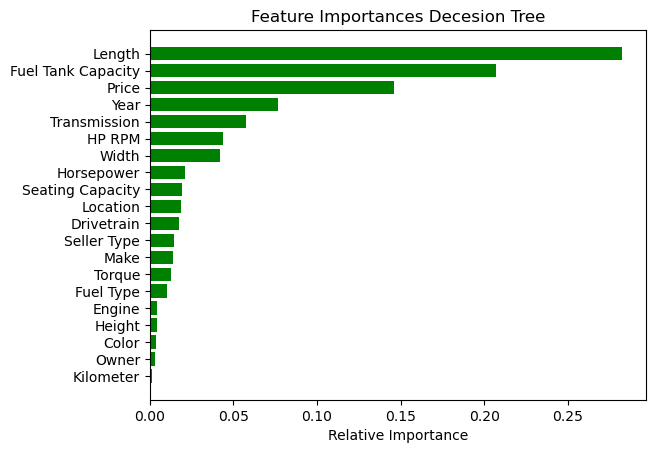

In [109]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances Decesion Tree')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [110]:
if not check_pickle_file("models/random_forest_india.pkl"):
    model = RandomForestClassifier()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
    print("Accuracy on Test Set: ", acc_score(ytest, ypred))

    with open("models/random_forest_india.pkl", "wb") as f:
        pickle.dump(model, f)

with open("models/random_forest_india.pkl", "rb") as f:
    model = pickle.load(f)

ypred = model.predict(xtest)
print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
print("Accuracy on Test Set: ", acc_score(ytest, ypred))

Accuracy on Train Set:  1.0
Accuracy on Test Set:  0.8398576512455516


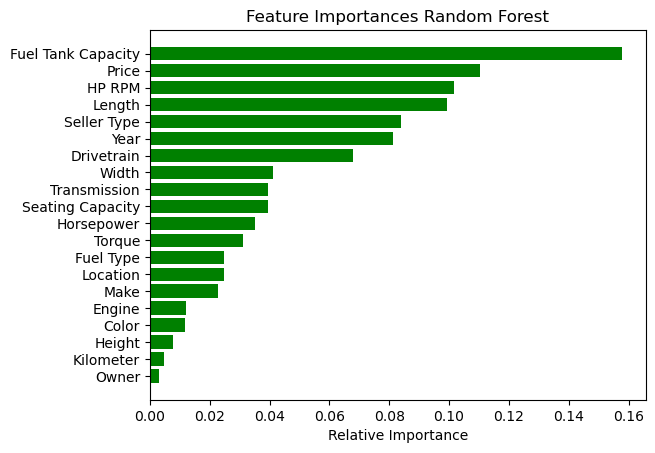

In [111]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances Random Forest')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [112]:
if not check_pickle_file("models/xgb_india.pkl"):
    model = XGBClassifier()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
    print("Accuracy on Test Set: ", acc_score(ytest, ypred))

    with open("models/xgb_india.pkl", "wb") as f:
        pickle.dump(model, f)

with open("models/xgb_india.pkl", "rb") as f:
    model = pickle.load(f)

ypred = model.predict(xtest)
print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
print("Accuracy on Test Set: ", acc_score(ytest, ypred))

Accuracy on Train Set:  1.0
Accuracy on Test Set:  0.8256227758007118


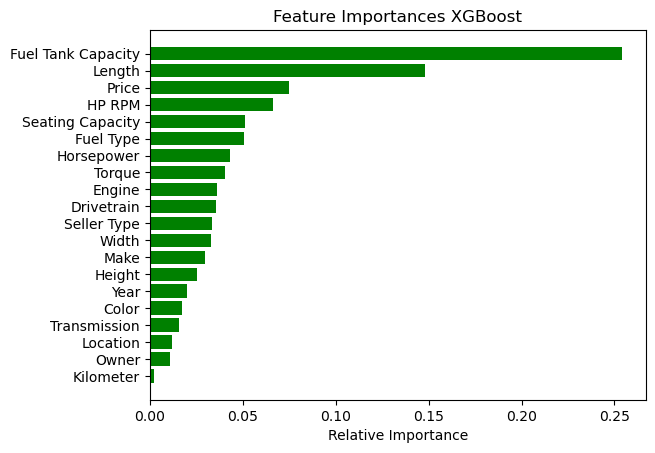

In [113]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances XGBoost')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [114]:
if not check_pickle_file("models/svm_india.pkl"):
    model = SVC(C=1e5)
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
    print("Accuracy on Test Set: ", acc_score(ytest, ypred))

    with open("models/svm_india.pkl", "wb") as f:
        pickle.dump(model, f)

with open("models/svm_india.pkl", "rb") as f:
    model = pickle.load(f)

ypred = model.predict(xtest)
print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
print("Accuracy on Test Set: ", acc_score(ytest, ypred))

Accuracy on Train Set:  0.8106870229007633
Accuracy on Test Set:  0.7330960854092526


In [115]:
if not check_pickle_file("models/mlp_india.pkl"):
    model = MLPClassifier(hidden_layer_sizes=[256, 256, 256], random_state=42, max_iter=1000, activation="relu")
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
    print("Accuracy on Test Set: ", acc_score(ytest, ypred))

    with open("models/mlp_india.pkl", "wb") as f:
        pickle.dump(model, f)

with open("models/mlp_india.pkl", "rb") as f:
    model = pickle.load(f)

ypred = model.predict(xtest)
print("Accuracy on Train Set: ", acc_score(ytrain, model.predict(xtrain)))
print("Accuracy on Test Set: ", acc_score(ytest, ypred))

Accuracy on Train Set:  0.683969465648855
Accuracy on Test Set:  0.6352313167259787


## SHAP Analysis

In [119]:
import shap
shap.initjs()

In [120]:
models = {
    'dtree': 'models/decision_tree_india.pkl',
    'rforest':'models/random_forest_india.pkl',
    'xgb': 'models/xgb_india.pkl',
    'svm': 'models/svm_india.pkl',
    'mlp': 'models/mlp_india.pkl',
}

shap_bins = {
    'dtree': 'shap_bin/decision_tree_india.pkl',
    'rforest':'shap_bin/random_forest_india.pkl',
    'xgb': 'shap_bin/xgb_india.pkl',
    'svm': 'shap_bin/svm_india.pkl',
    'mlp': 'shap_bin/mlp_india.pkl',
}

### Decision Tree

In [121]:
model_name = "dtree"

In [122]:
if check_pickle_file(shap_bins[model_name]) == False:
    with open(models[model_name], "rb") as f:
        model = pickle.load(f)

    explainer = shap.GPUTreeExplainer(model, dfX)
    shap_values_cat = explainer(dfX)

    with open(shap_bins[model_name], "wb") as f:
        pickle.dump(shap_values_cat, f)

with open(shap_bins[model_name], "rb") as f:
    shap_values_cat = pickle.load(f)

#### Feature Contribution

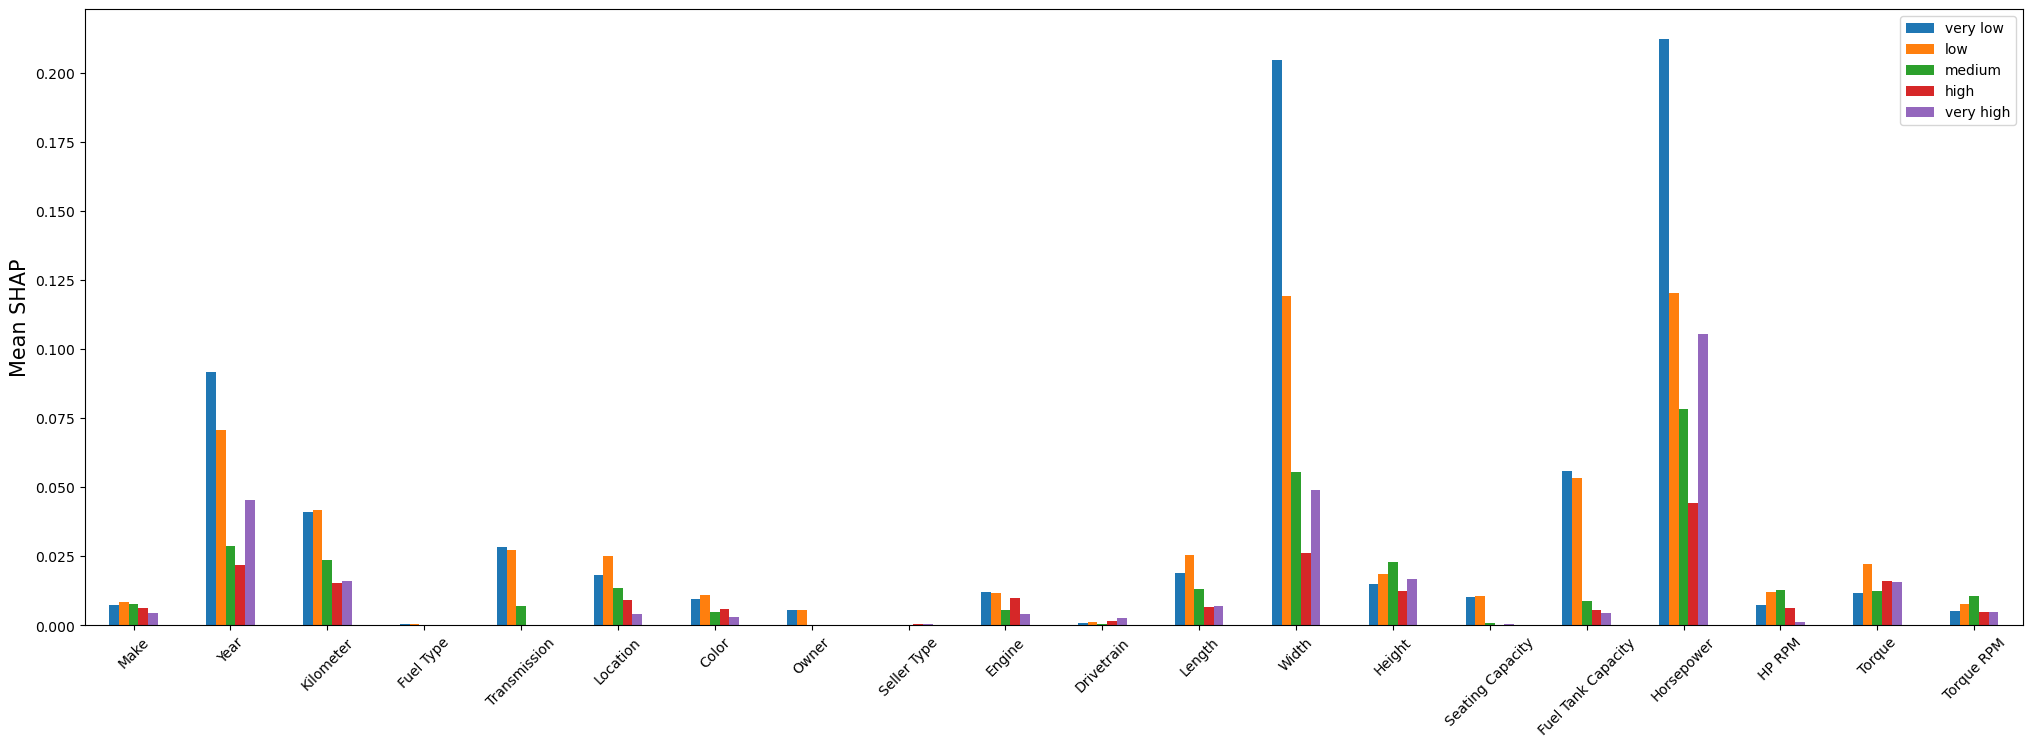

In [123]:
# calculate mean SHAP values for each class
mean_0 = np.mean(np.abs(shap_values_cat.values[:,:,0]),axis=0)
mean_1 = np.mean(np.abs(shap_values_cat.values[:,:,1]),axis=0)
mean_2 = np.mean(np.abs(shap_values_cat.values[:,:,2]),axis=0)
mean_3 = np.mean(np.abs(shap_values_cat.values[:,:,3]),axis=0)
mean_4 = np.mean(np.abs(shap_values_cat.values[:,:,4]),axis=0)

df = pd.DataFrame({'very low': mean_0, 'low': mean_1, 'medium': mean_2, 'high': mean_3, 'very high': mean_4})

# plot mean SHAP values
fig,ax = plt.subplots(1,1,figsize=(25,8))
df.plot.bar(ax=ax)

ax.set_ylabel('Mean SHAP', size = 15)
ax.set_xticklabels(dfX.columns,rotation=45,size=10)
ax.legend(fontsize=10)

In [124]:
very_low_values = []
low_values = []
medium_values = []
high_values = []
very_high_values = []

for i in range(len(dfX)):
    very_low_values.append(shap_values_cat.values[i][:,0])
    low_values.append(shap_values_cat.values[i][:,1])
    medium_values.append(shap_values_cat.values[i][:,2])
    high_values.append(shap_values_cat.values[i][:,3])
    very_high_values.append(shap_values_cat.values[i][:,4])

In [125]:
original = shap_values_cat.values

##### Very Low Price

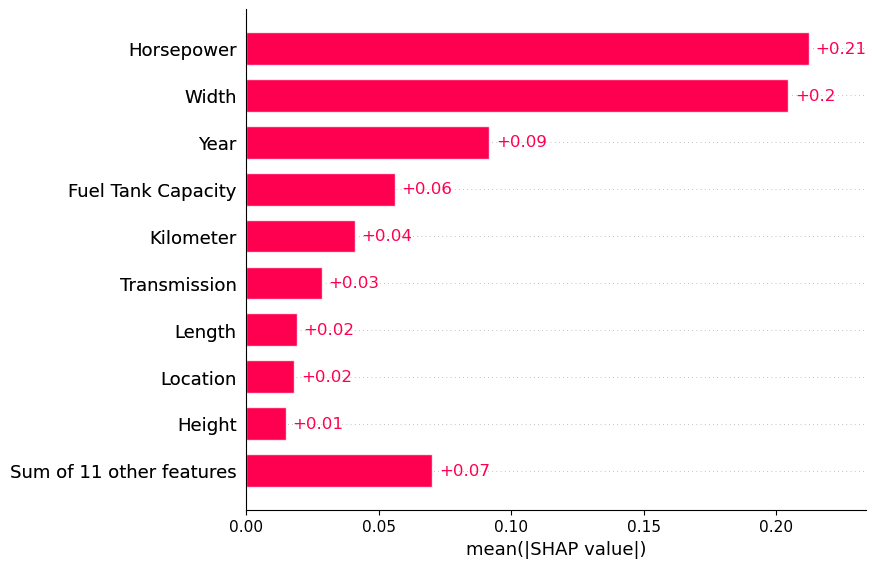

In [126]:
shap_values_cat.values = np.array(very_low_values)
shap.plots.bar(shap_values_cat)

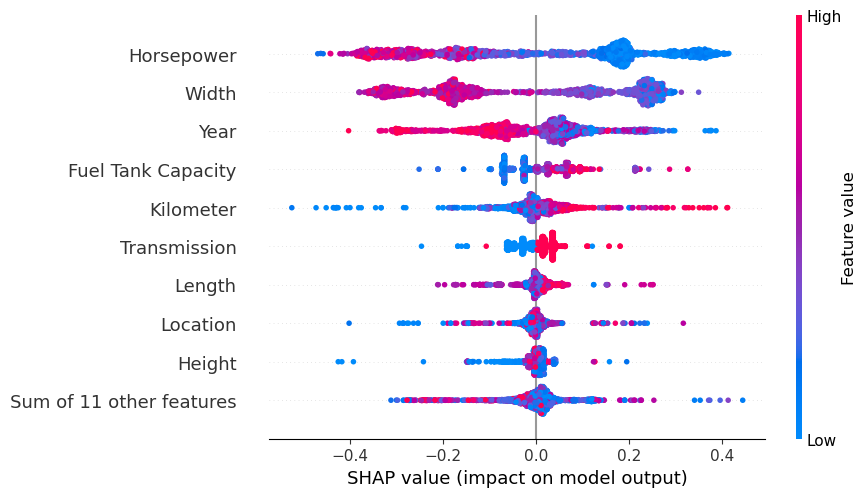

In [127]:
shap.plots.beeswarm(shap_values_cat)

##### Low Price

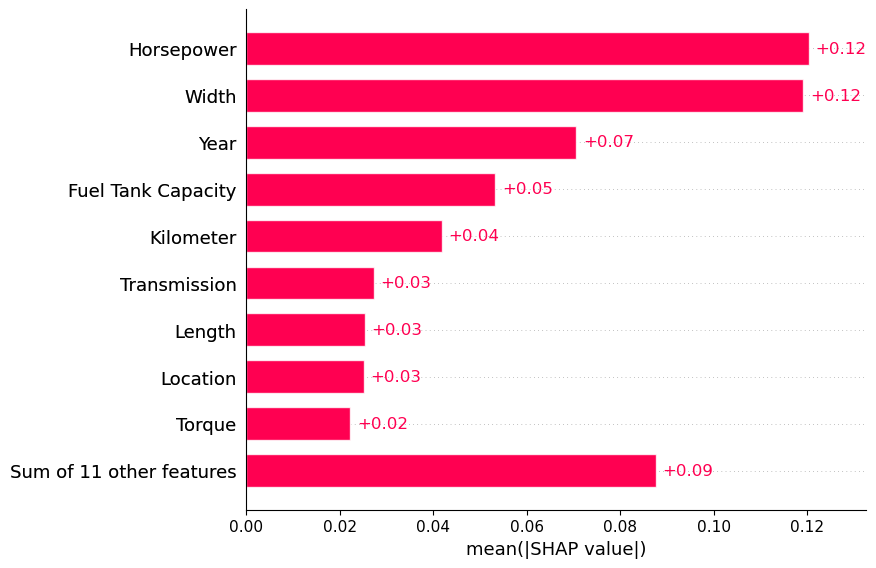

In [128]:
shap_values_cat.values = np.array(low_values)
shap.plots.bar(shap_values_cat)

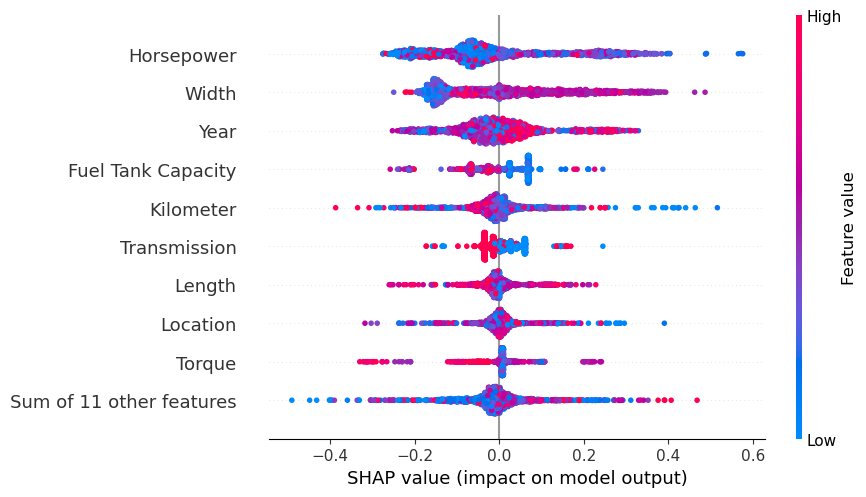

In [129]:
shap.plots.beeswarm(shap_values_cat)

##### Medium Price

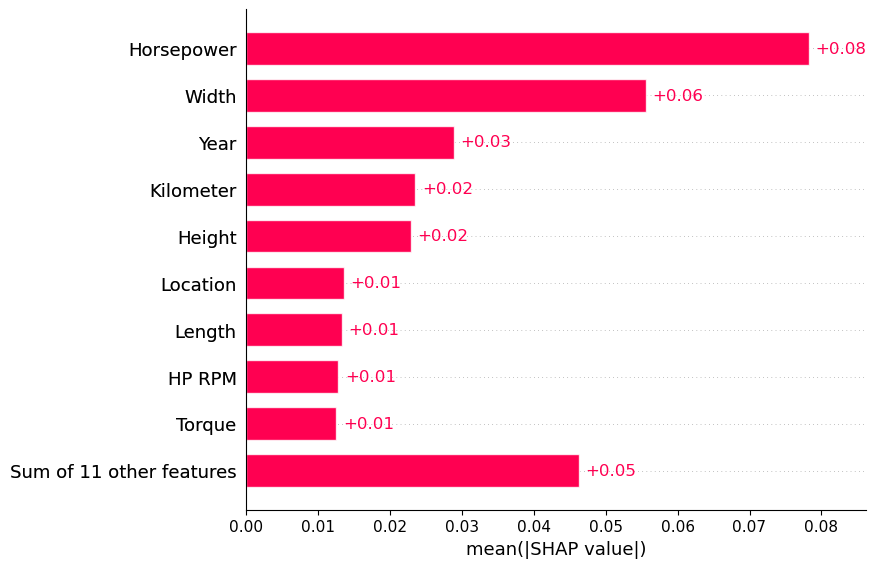

In [130]:
shap_values_cat.values = np.array(medium_values)
shap.plots.bar(shap_values_cat)

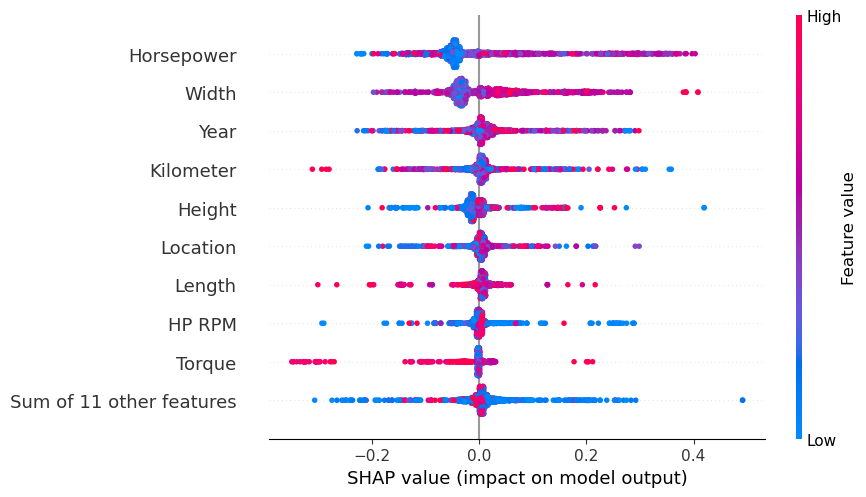

In [131]:
shap.plots.beeswarm(shap_values_cat)

##### High Price

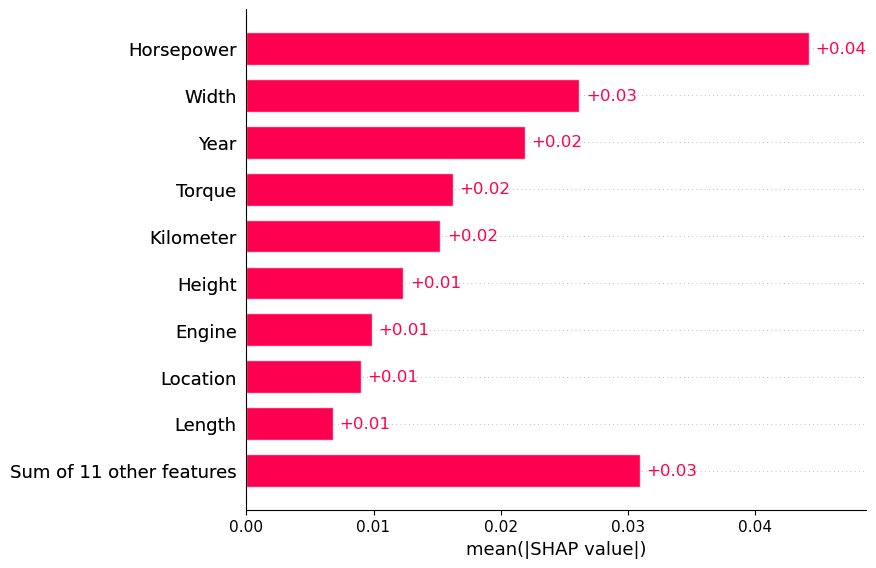

In [132]:
shap_values_cat.values = np.array(high_values)
shap.plots.bar(shap_values_cat)

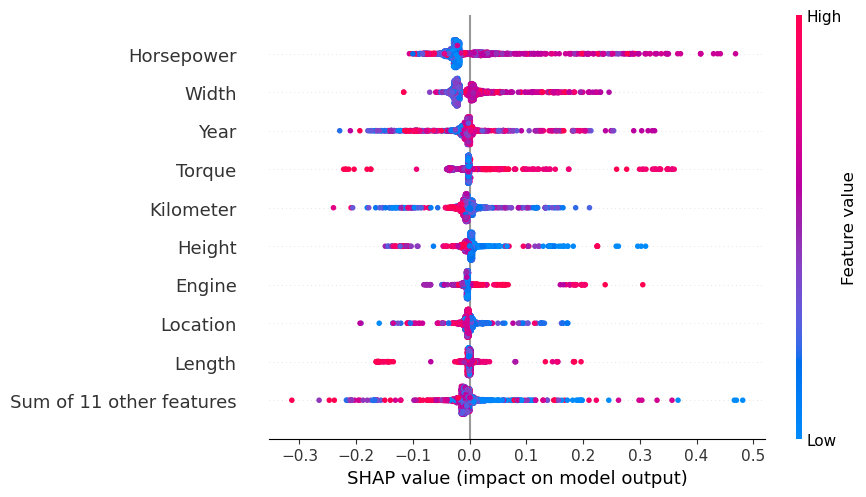

In [133]:
shap.plots.beeswarm(shap_values_cat)

##### Very High Price

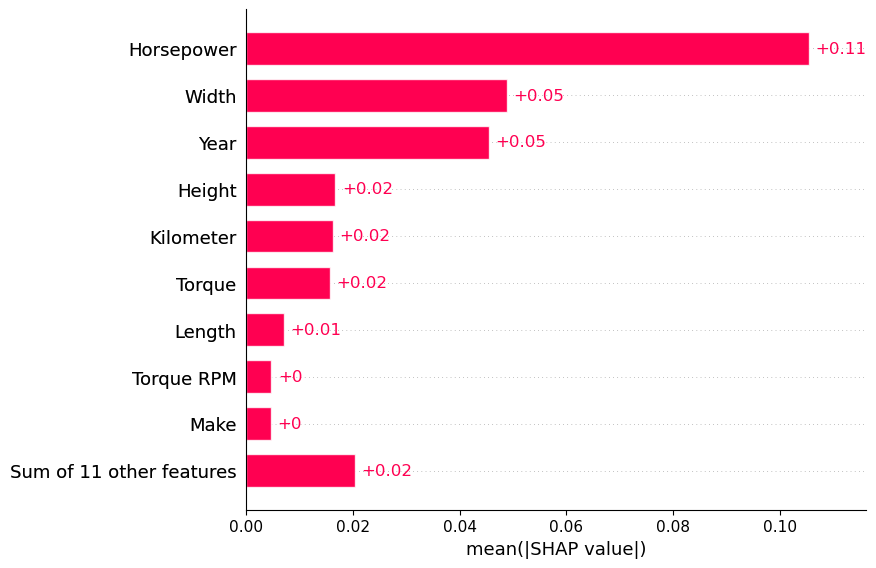

In [134]:
shap_values_cat.values = np.array(very_high_values)
shap.plots.bar(shap_values_cat)

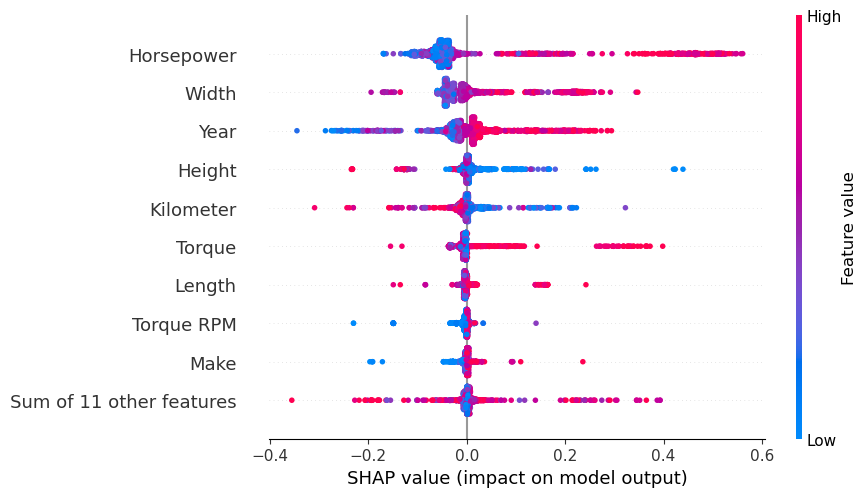

In [135]:
shap.plots.beeswarm(shap_values_cat)

##### Overall Contribution Across Classes

In [136]:
# get model predictions
preds = model.predict(dfX)
shap_values_cat.values = original
new_shap_values = []
for i, pred in enumerate(preds):
    # get shap values for predicted class
    new_shap_values.append(shap_values_cat.values[i][:,pred])

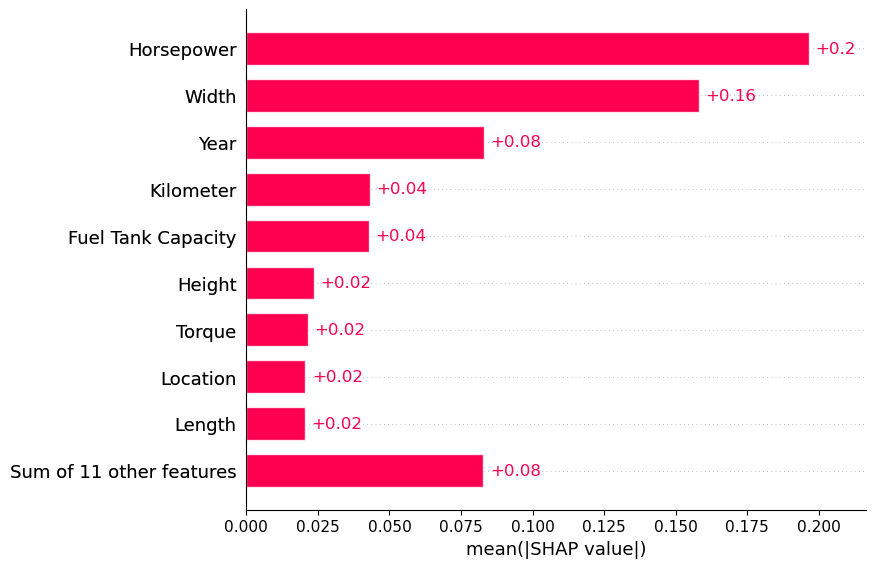

In [137]:
# replace shap values
shap_values_cat.values = np.array(new_shap_values)
shap.plots.bar(shap_values_cat)

### Random Forest

In [138]:
model_name = "rforest"

In [139]:
if check_pickle_file(shap_bins[model_name]) == False:
    with open(models[model_name], "rb") as f:
        model = pickle.load(f)

    explainer = shap.GPUTreeExplainer(model, dfX)
    shap_values_cat = explainer(dfX)

    with open(shap_bins[model_name], "wb") as f:
        pickle.dump(shap_values_cat, f)

with open(shap_bins[model_name], "rb") as f:
    shap_values_cat = pickle.load(f)

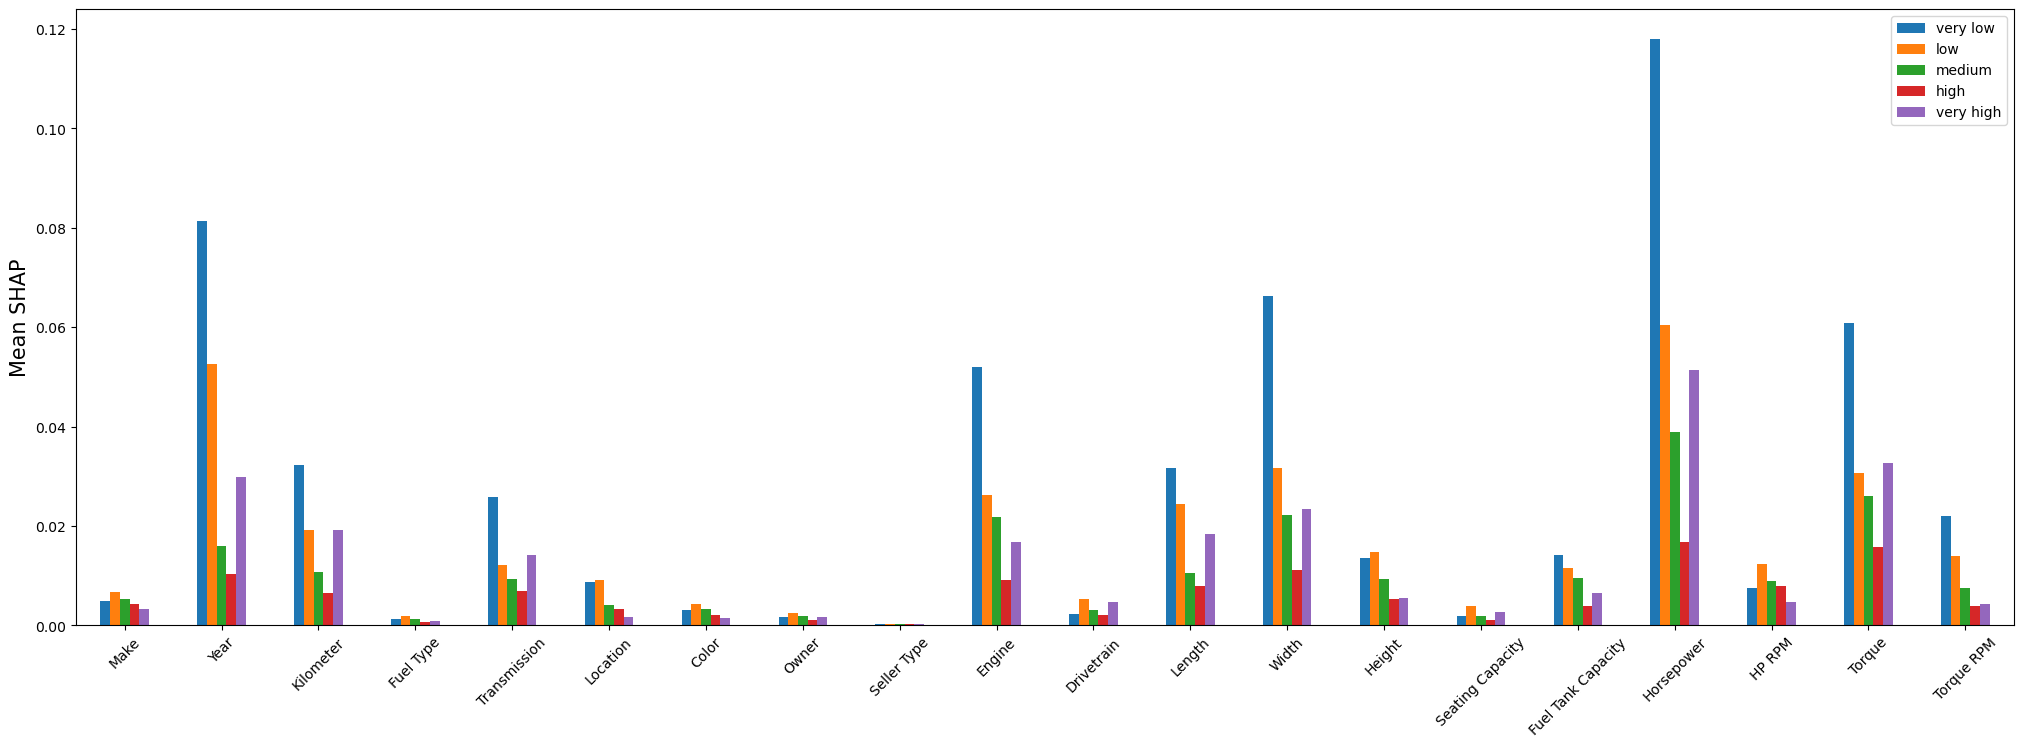

In [140]:
# calculate mean SHAP values for each class
mean_0 = np.mean(np.abs(shap_values_cat.values[:,:,0]),axis=0)
mean_1 = np.mean(np.abs(shap_values_cat.values[:,:,1]),axis=0)
mean_2 = np.mean(np.abs(shap_values_cat.values[:,:,2]),axis=0)
mean_3 = np.mean(np.abs(shap_values_cat.values[:,:,3]),axis=0)
mean_4 = np.mean(np.abs(shap_values_cat.values[:,:,4]),axis=0)

df = pd.DataFrame({'very low': mean_0, 'low': mean_1, 'medium': mean_2, 'high': mean_3, 'very high': mean_4})

# plot mean SHAP values
fig,ax = plt.subplots(1,1,figsize=(25,8))
df.plot.bar(ax=ax)

ax.set_ylabel('Mean SHAP', size = 15)
ax.set_xticklabels(dfX.columns,rotation=45,size=10)
ax.legend(fontsize=10)

In [141]:
very_low_values = []
low_values = []
medium_values = []
high_values = []
very_high_values = []

for i in range(len(dfX)):
    very_low_values.append(shap_values_cat.values[i][:,0])
    low_values.append(shap_values_cat.values[i][:,1])
    medium_values.append(shap_values_cat.values[i][:,2])
    high_values.append(shap_values_cat.values[i][:,3])
    very_high_values.append(shap_values_cat.values[i][:,4])

In [142]:
original_values = shap_values_cat.values

##### Very Low Price

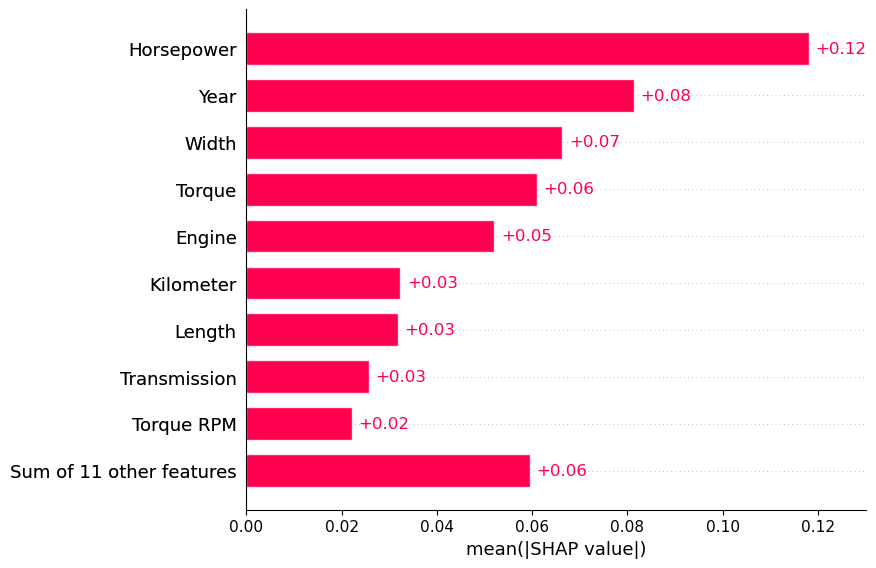

In [143]:
shap_values_cat.values = np.array(very_low_values)
shap.plots.bar(shap_values_cat)

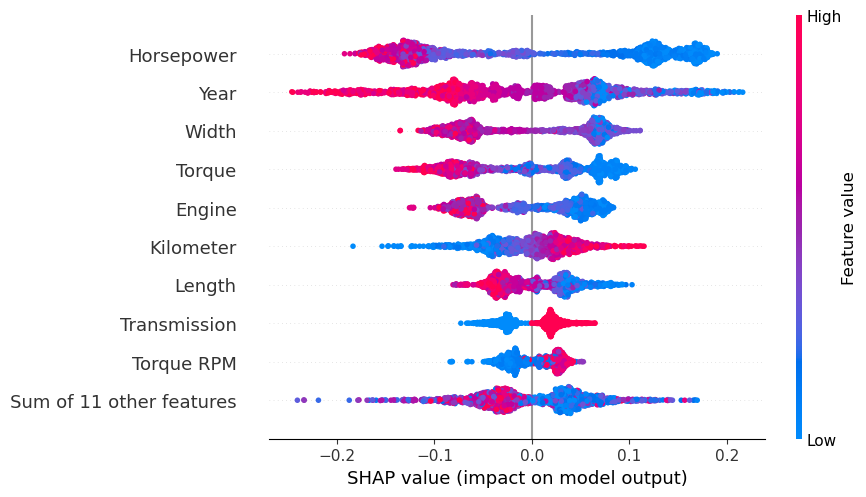

In [144]:
shap.plots.beeswarm(shap_values_cat)

##### Low Price

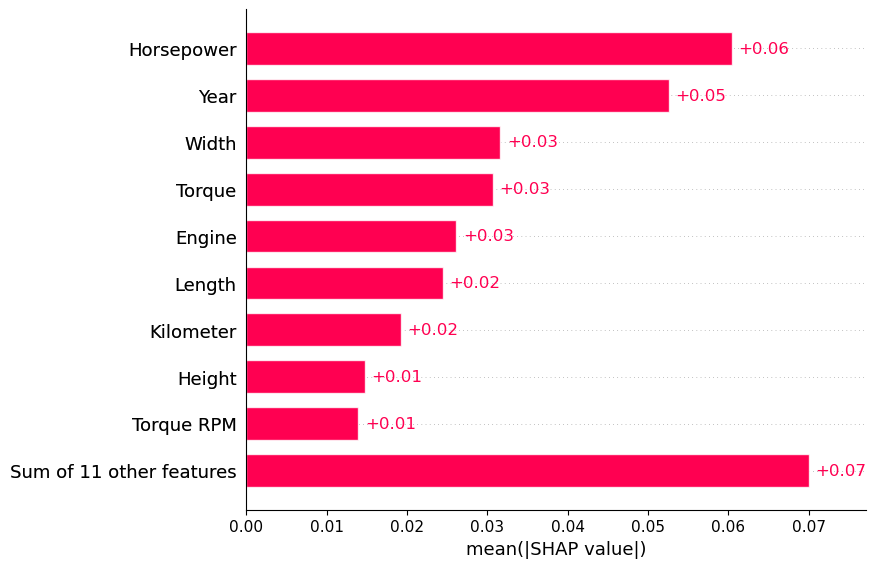

In [145]:
shap_values_cat.values = np.array(low_values)
shap.plots.bar(shap_values_cat)

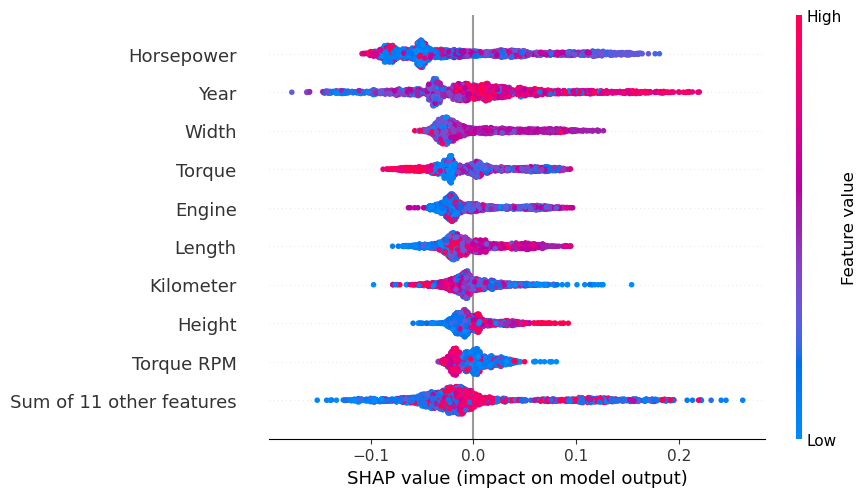

In [146]:
shap.plots.beeswarm(shap_values_cat)

##### Medium Price

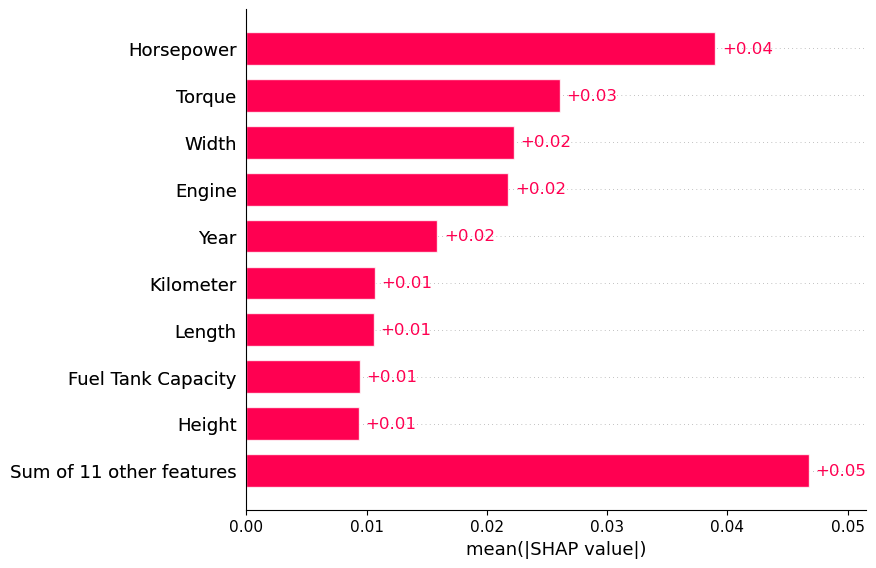

In [147]:
shap_values_cat.values = np.array(medium_values)
shap.plots.bar(shap_values_cat)

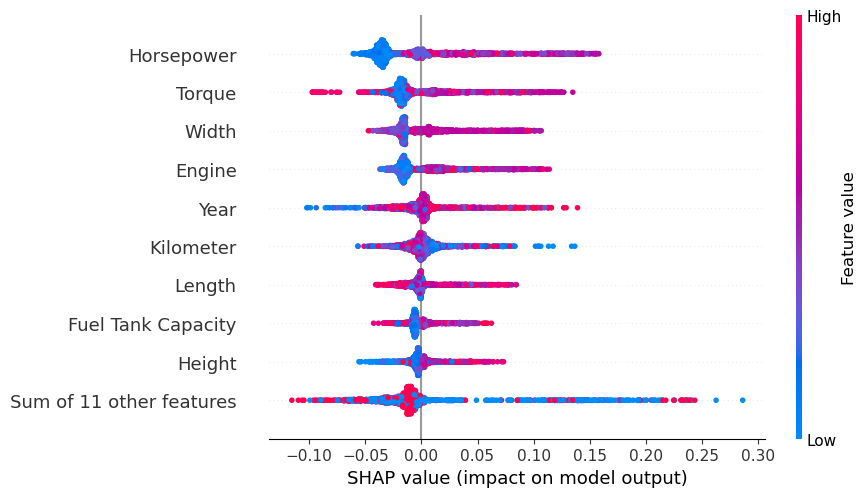

In [148]:
shap.plots.beeswarm(shap_values_cat)

##### High Price

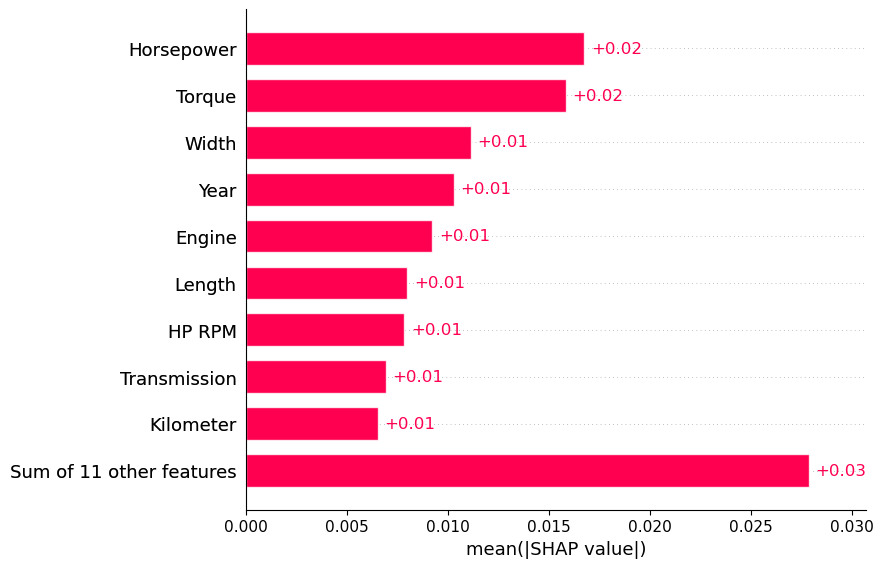

In [149]:
shap_values_cat.values = np.array(high_values)
shap.plots.bar(shap_values_cat)

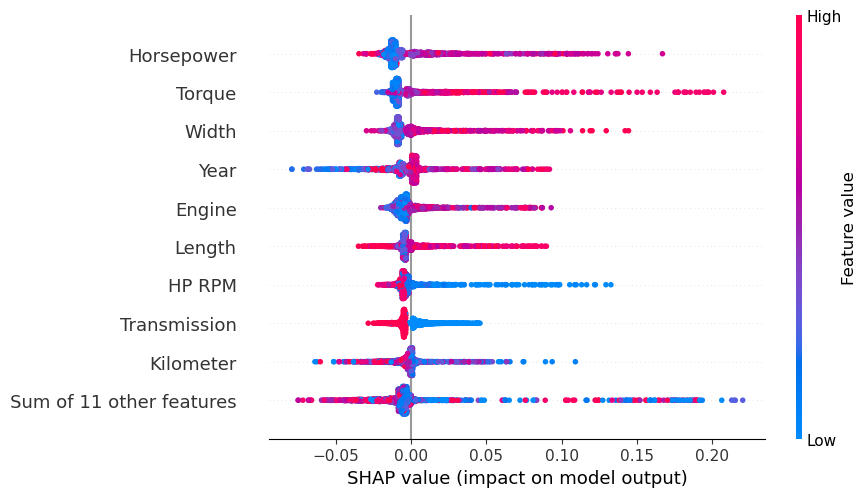

In [150]:
shap.plots.beeswarm(shap_values_cat)

##### Very High Price

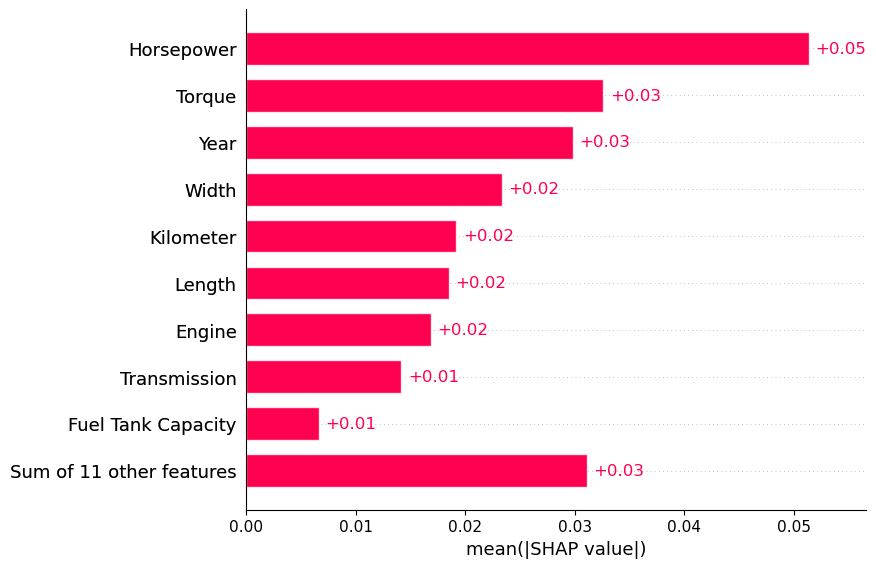

In [151]:
shap_values_cat.values = np.array(very_high_values)
shap.plots.bar(shap_values_cat)

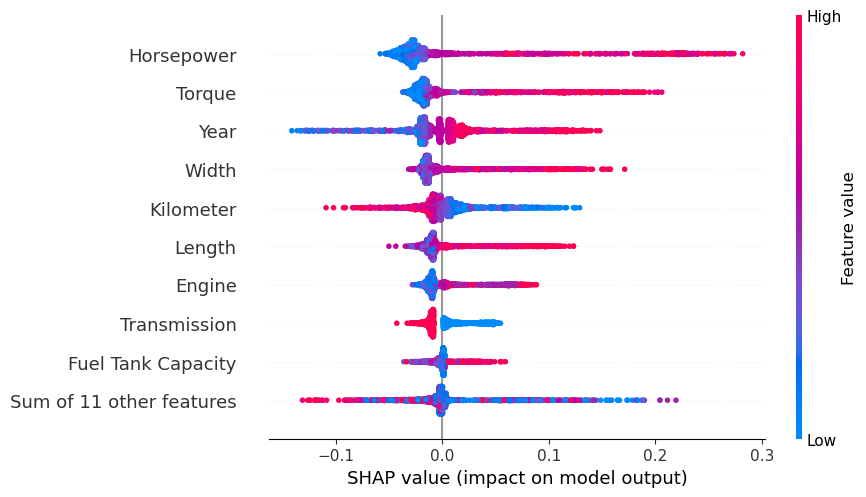

In [152]:
shap.plots.beeswarm(shap_values_cat)

##### Overall Contribution Across Classes

In [153]:
# get model predictions
preds = model.predict(dfX)
shap_values_cat.values = original_values
new_shap_values = []
for i, pred in enumerate(preds):
    # get shap values for predicted class
    new_shap_values.append(shap_values_cat.values[i][:,pred])

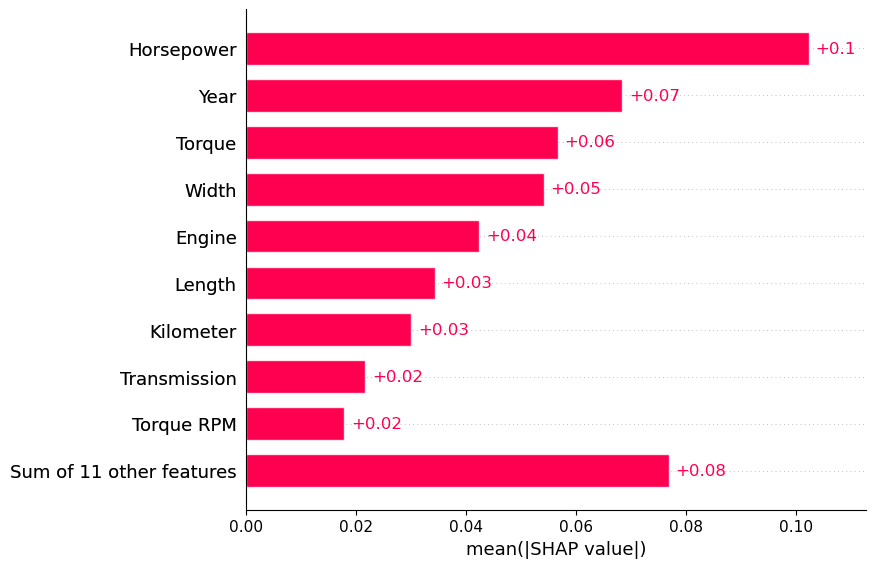

In [154]:
# replace shap values
shap_values_cat.values = np.array(new_shap_values)
shap.plots.bar(shap_values_cat)

### XGB Classifier

In [155]:
model_name = "xgb"

In [156]:
if check_pickle_file(shap_bins[model_name]) == False:
    with open(models[model_name], "rb") as f:
        model = pickle.load(f)

    explainer = shap.GPUTreeExplainer(model, dfX)
    shap_values_cat = explainer(dfX)

    with open(shap_bins[model_name], "wb") as f:
        pickle.dump(shap_values_cat, f)

with open(shap_bins[model_name], "rb") as f:
    shap_values_cat = pickle.load(f)

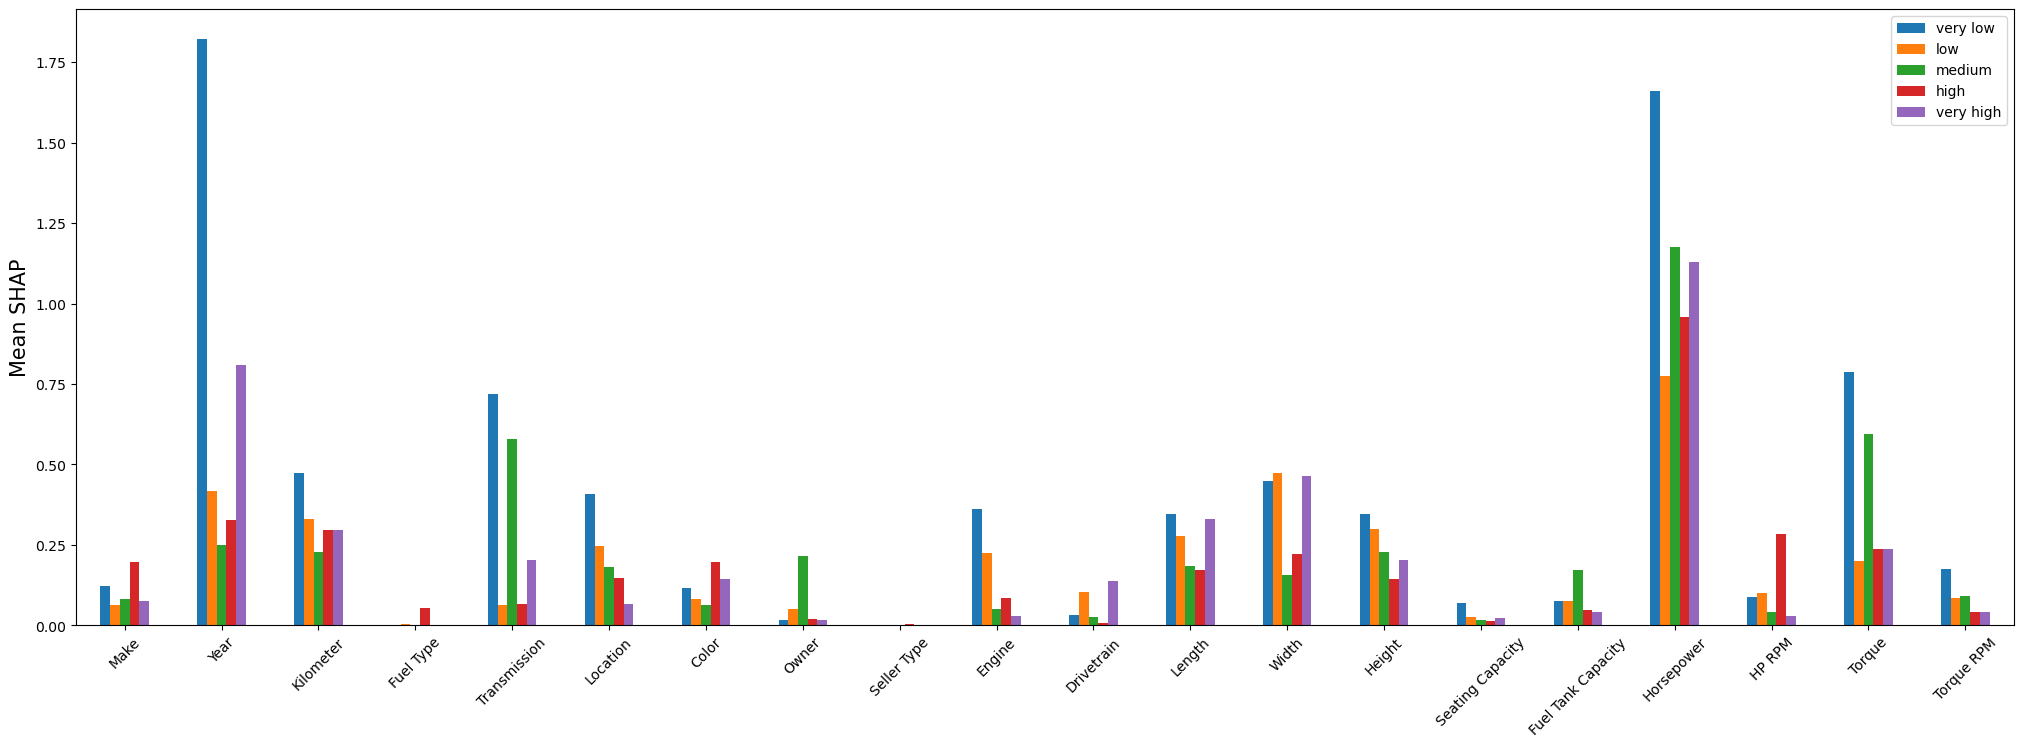

In [157]:
# calculate mean SHAP values for each class
mean_0 = np.mean(np.abs(shap_values_cat.values[:,:,0]),axis=0)
mean_1 = np.mean(np.abs(shap_values_cat.values[:,:,1]),axis=0)
mean_2 = np.mean(np.abs(shap_values_cat.values[:,:,2]),axis=0)
mean_3 = np.mean(np.abs(shap_values_cat.values[:,:,3]),axis=0)
mean_4 = np.mean(np.abs(shap_values_cat.values[:,:,4]),axis=0)

df = pd.DataFrame({'very low': mean_0, 'low': mean_1, 'medium': mean_2, 'high': mean_3, 'very high': mean_4})

# plot mean SHAP values
fig,ax = plt.subplots(1,1,figsize=(25,8))
df.plot.bar(ax=ax)

ax.set_ylabel('Mean SHAP', size = 15)
ax.set_xticklabels(dfX.columns,rotation=45,size=10)
ax.legend(fontsize=10)

In [158]:
very_low_values = []
low_values = []
medium_values = []
high_values = []
very_high_values = []

for i in range(len(dfX)):
    very_low_values.append(shap_values_cat.values[i][:,0])
    low_values.append(shap_values_cat.values[i][:,1])
    medium_values.append(shap_values_cat.values[i][:,2])
    high_values.append(shap_values_cat.values[i][:,3])
    very_high_values.append(shap_values_cat.values[i][:,4])

In [159]:
original_values = shap_values_cat.values

##### Very Low Price

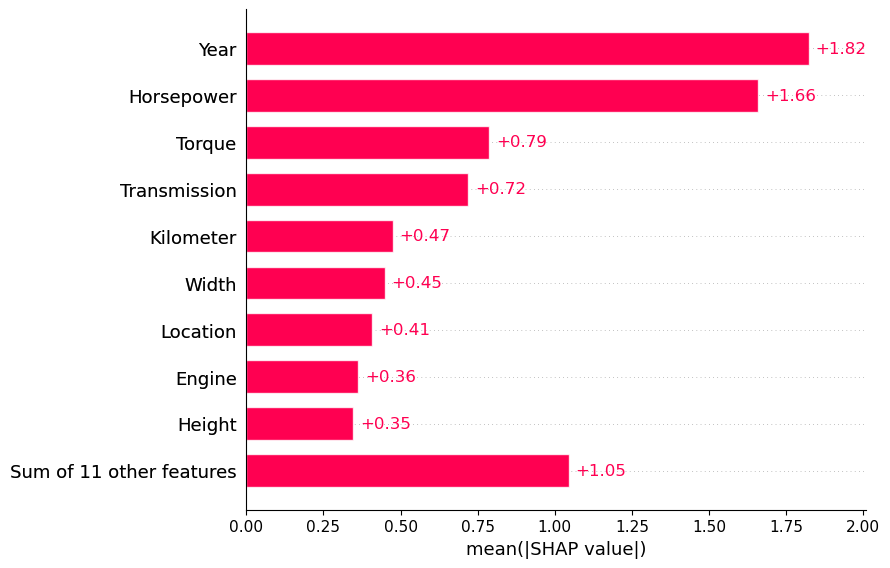

In [160]:
shap_values_cat.values = np.array(very_low_values)
shap.plots.bar(shap_values_cat)

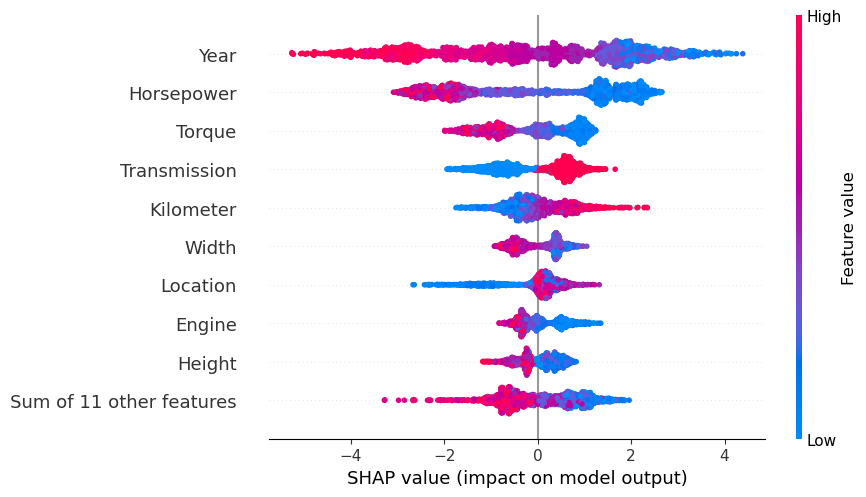

In [161]:
shap.plots.beeswarm(shap_values_cat)

##### Low Price

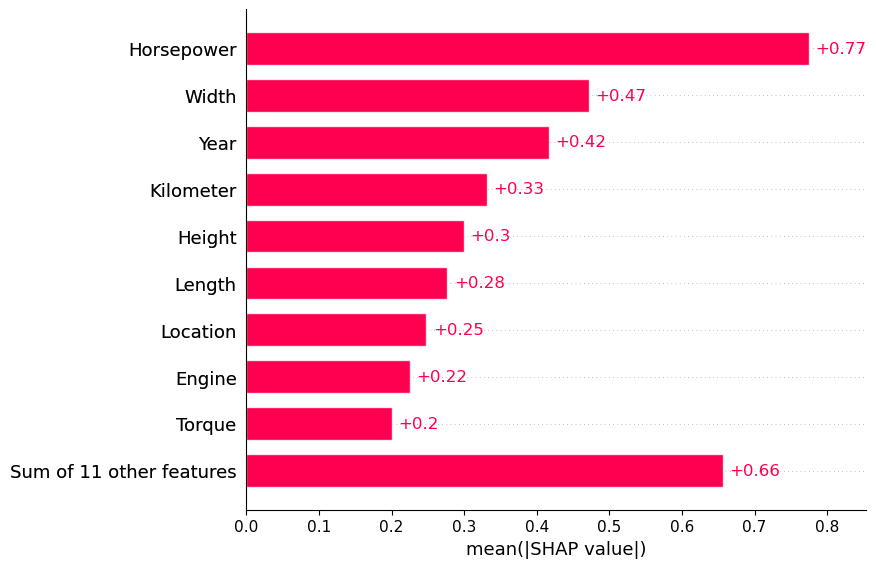

In [162]:
shap_values_cat.values = np.array(low_values)
shap.plots.bar(shap_values_cat)

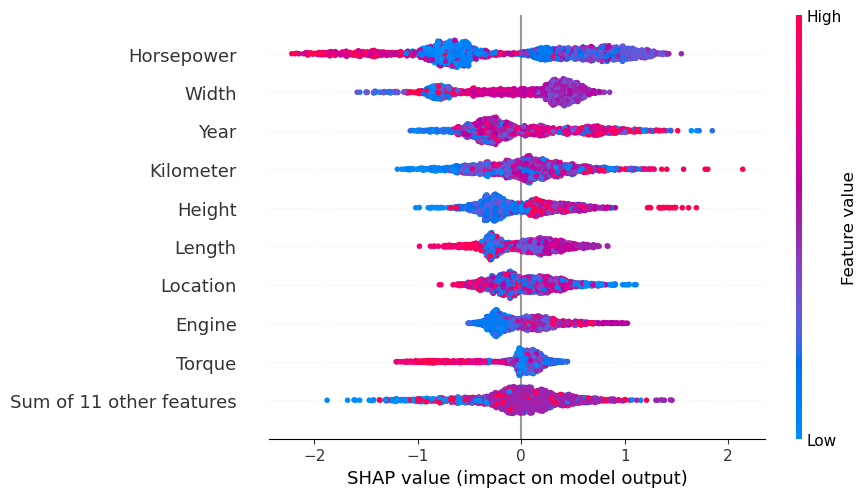

In [163]:
shap.plots.beeswarm(shap_values_cat)

##### Medium Price

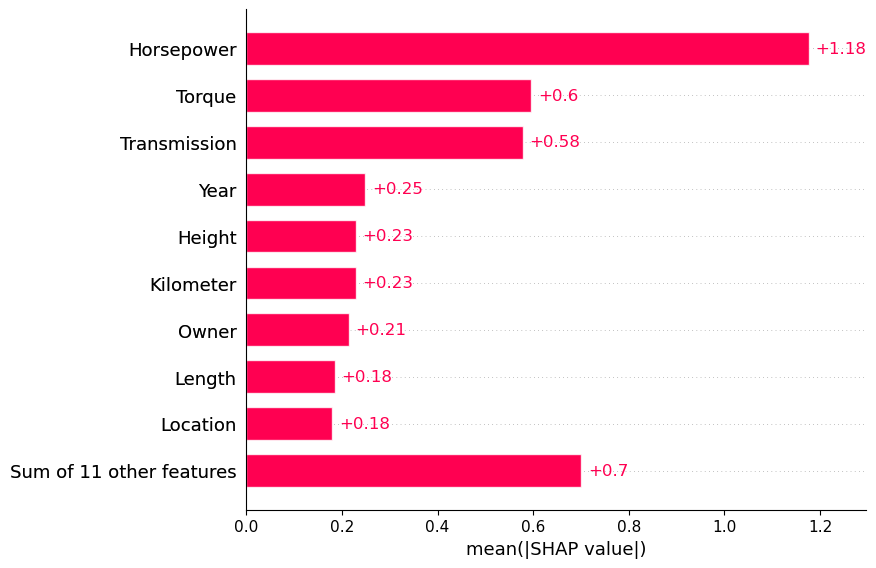

In [164]:
shap_values_cat.values = np.array(medium_values)
shap.plots.bar(shap_values_cat)

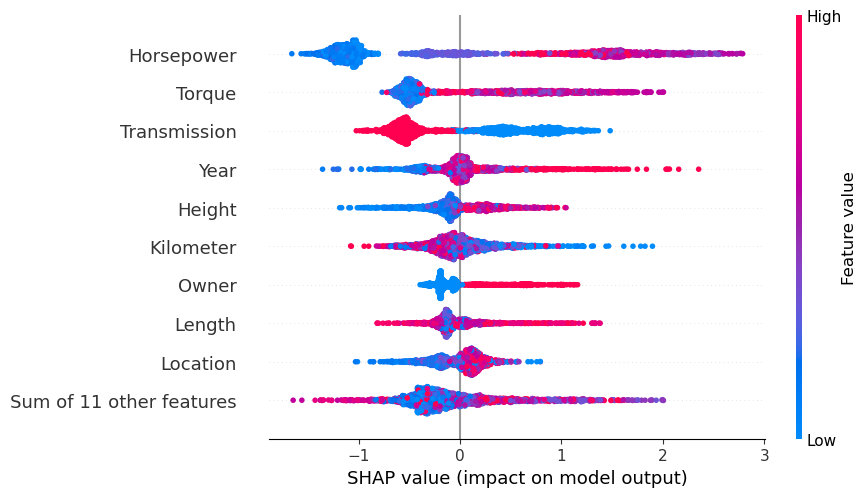

In [165]:
shap.plots.beeswarm(shap_values_cat)

##### High Price

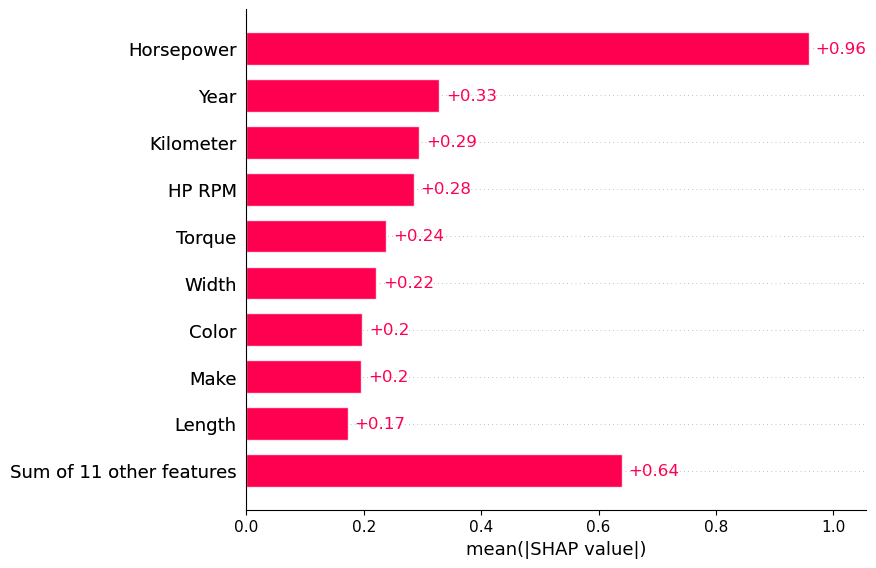

In [166]:
shap_values_cat.values = np.array(high_values)
shap.plots.bar(shap_values_cat)

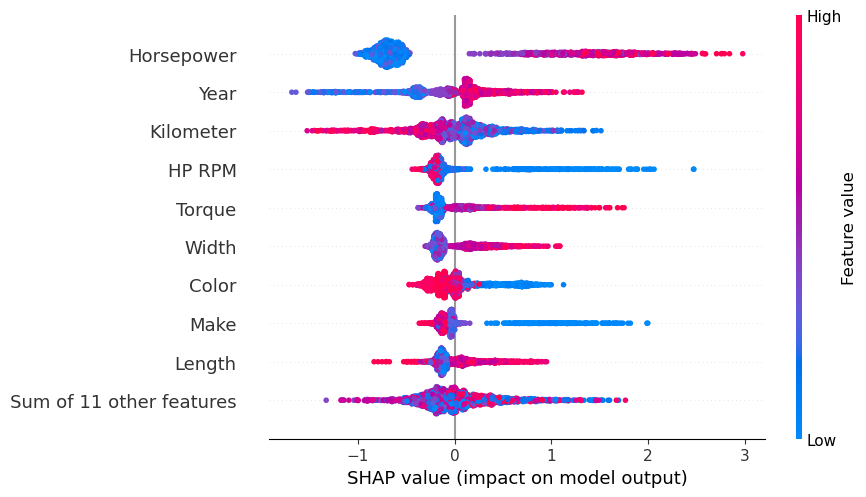

In [167]:
shap.plots.beeswarm(shap_values_cat)

##### Very High Price

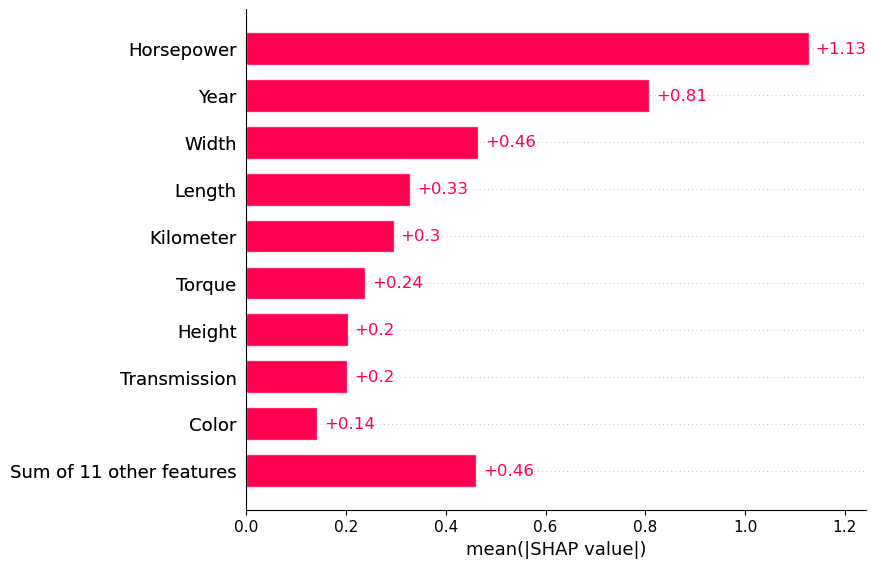

In [168]:
shap_values_cat.values = np.array(very_high_values)
shap.plots.bar(shap_values_cat)

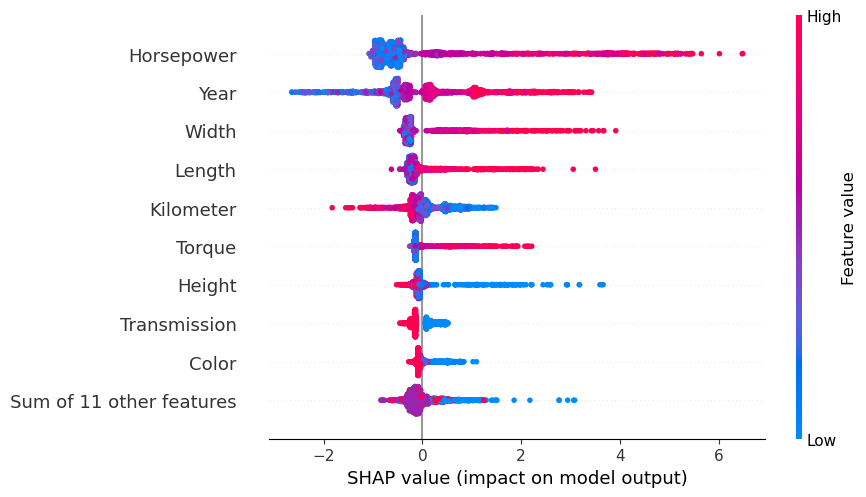

In [169]:
shap.plots.beeswarm(shap_values_cat)

##### Overall Contribution Across Classes

In [170]:
# get model predictions
preds = model.predict(dfX)
shap_values_cat.values = original_values
new_shap_values = []
for i, pred in enumerate(preds):
    # get shap values for predicted class
    new_shap_values.append(shap_values_cat.values[i][:,pred])

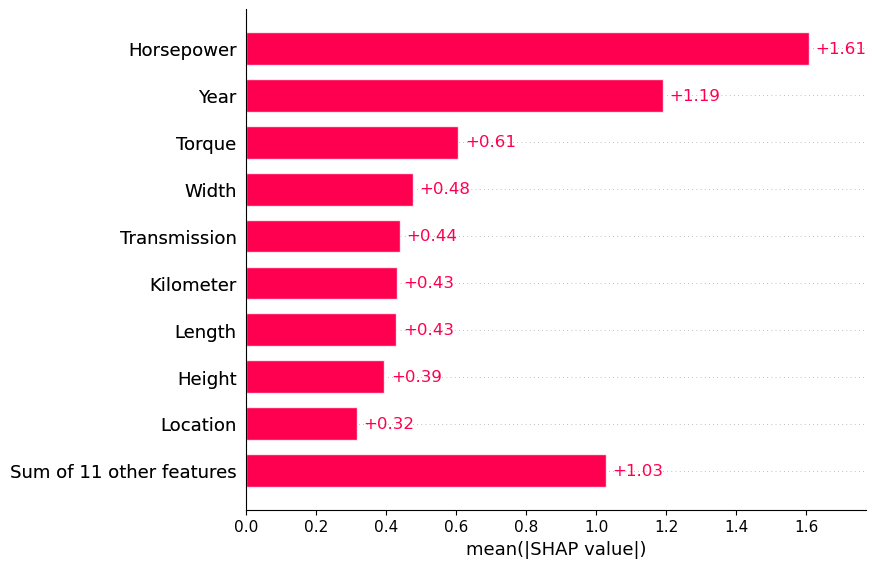

In [171]:
# replace shap values
shap_values_cat.values = np.array(new_shap_values)
shap.plots.bar(shap_values_cat)

### MLP Classifier

In [172]:
model_name = "mlp"

In [174]:
if check_pickle_file(shap_bins[model_name]) == False:
    with open(models[model_name], "rb") as f:
        model = pickle.load(f)

    explainer = shap.Explainer(model.predict, dfX)
    shap_values_cat = explainer(dfX)

    with open(shap_bins[model_name], "wb") as f:
        pickle.dump(shap_values_cat, f)

with open(shap_bins[model_name], "rb") as f:
    shap_values_cat = pickle.load(f)

PermutationExplainer explainer: 1873it [05:37,  5.41it/s]                          


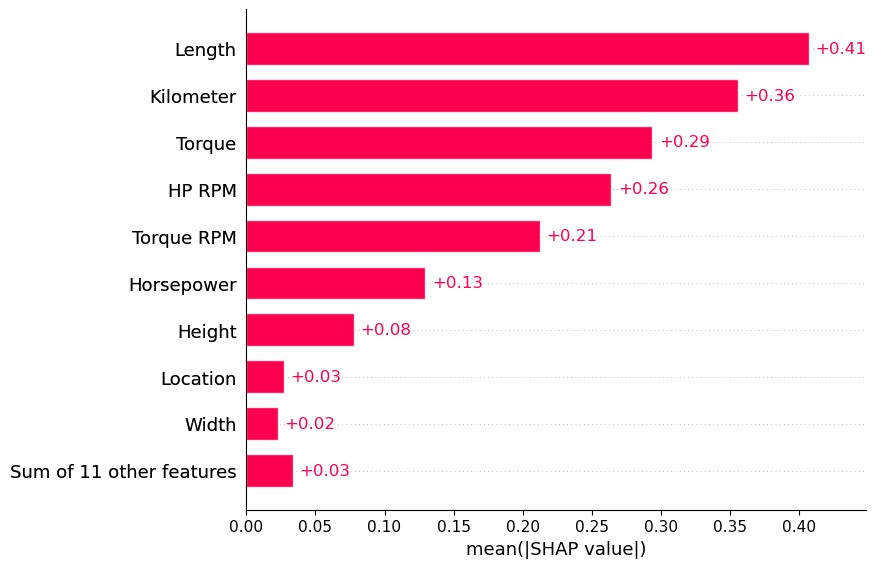

In [180]:
shap.plots.bar(shap_values_cat)

### SVM Classifier

In [199]:
model_name = "svm"

In [201]:
if check_pickle_file(shap_bins[model_name]) == False:
    with open(models[model_name], "rb") as f:
        model = pickle.load(f)

    explainer = shap.Explainer(model.predict, dfX)
    shap_values_cat = explainer(dfX)

    with open(shap_bins[model_name], "wb") as f:
        pickle.dump(shap_values_cat, f)

with open(shap_bins[model_name], "rb") as f:
    shap_values_cat = pickle.load(f)

PermutationExplainer explainer:   1%|          | 23/1872 [00:32<1:06:43,  2.17s/it]


KeyboardInterrupt: 

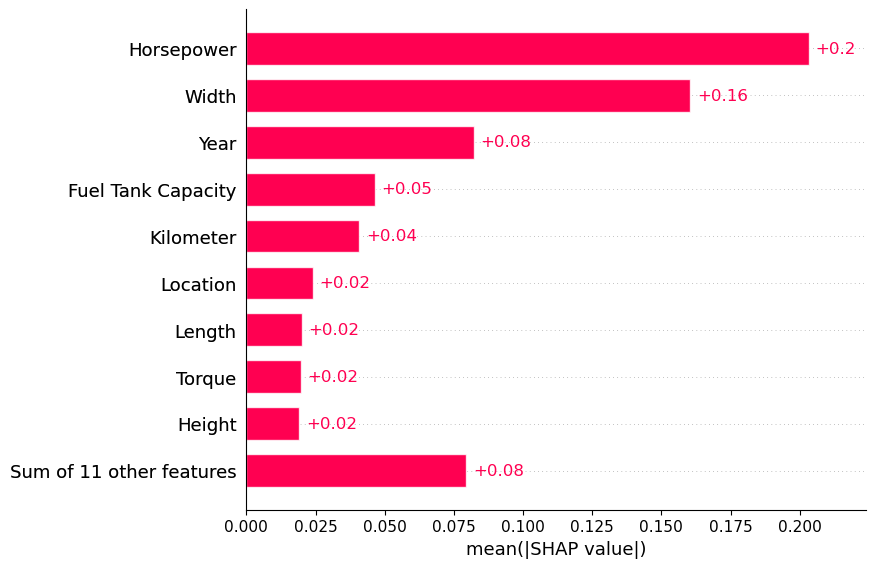

In [102]:
shap.plots.bar(shap_values_cat)